<a href="https://colab.research.google.com/github/Bimal999/python/blob/main/stock_price_prediction_using_ltsm_of_netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout
import tensorflow as tf
from tensorflow import keras

In [3]:
#reading the data and making the date is the index
data=pd.read_csv('NFLX.csv',index_col='Date',parse_dates=True)
data.head(5)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   

              Volume  
Date                  
2018-02-05  11896100  
2018-02-06  12595800  
2018-02-07   8981500  
2018-02-08   9306700  
2018-02-09  16906900

In [ ]:
data.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   

              Volume  
Date                  
2018-02-05  11896100  
2018-02-06  12595800  
2018-02-07   8981500  
2018-02-08   9306700  
2018-02-09  16906900

In [ ]:
data.describe()

Open         High          Low        Close    Adj Close  \
count  1009.000000  1009.000000  1009.000000  1009.000000  1009.000000   
mean    419.059673   425.320703   412.374044   419.000733   419.000733   
std     108.537532   109.262960   107.555867   108.289999   108.289999   
min     233.919998   250.649994   231.229996   233.880005   233.880005   
25%     331.489990   336.299988   326.000000   331.619995   331.619995   
50%     377.769989   383.010010   370.880005   378.670013   378.670013   
75%     509.130005   515.630005   502.529999   509.079987   509.079987   
max     692.349976   700.989990   686.090027   691.690002   691.690002   

             Volume  
count  1.009000e+03  
mean   7.570685e+06  
std    5.465535e+06  
min    1.144000e+06  
25%    4.091900e+06  
50%    5.934500e+06  
75%    9.322400e+06  
max    5.890430e+07

In [ ]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1009 entries, 2018-02-05 to 2022-02-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1009 non-null   float64
 1   High       1009 non-null   float64
 2   Low        1009 non-null   float64
 3   Close      1009 non-null   float64
 4   Adj Close  1009 non-null   float64
 5   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.2 KB


In [ ]:
data.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   

              Volume  
Date                  
2018-02-05  11896100  
2018-02-06  12595800  
2018-02-07   8981500  
2018-02-08   9306700  
2018-02-09  16906900

- There is no NaN data
- Date handled already
- next step is ploting our Data to see what is the important feature

# Ploting Data

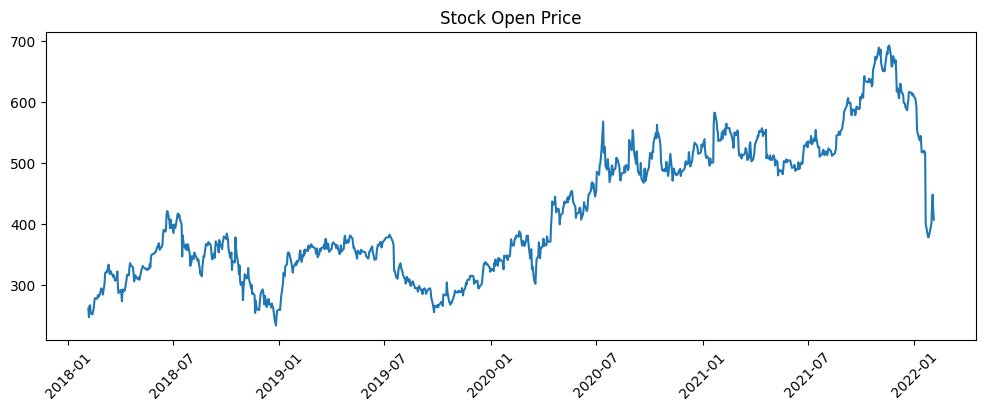

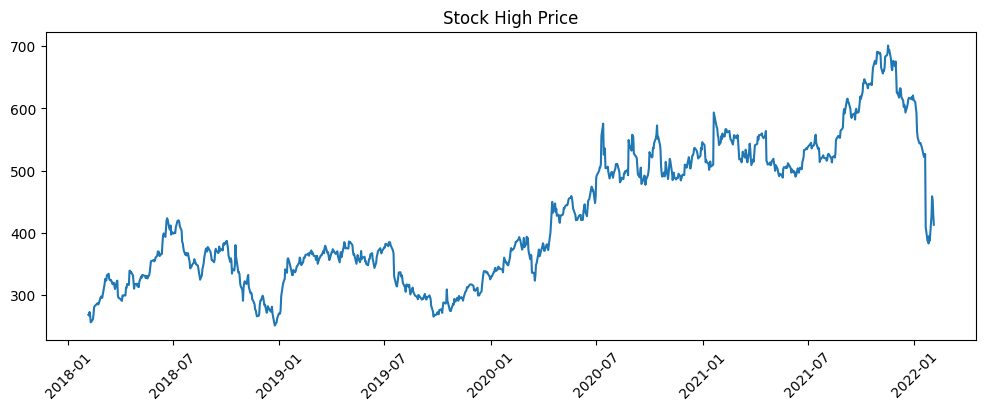

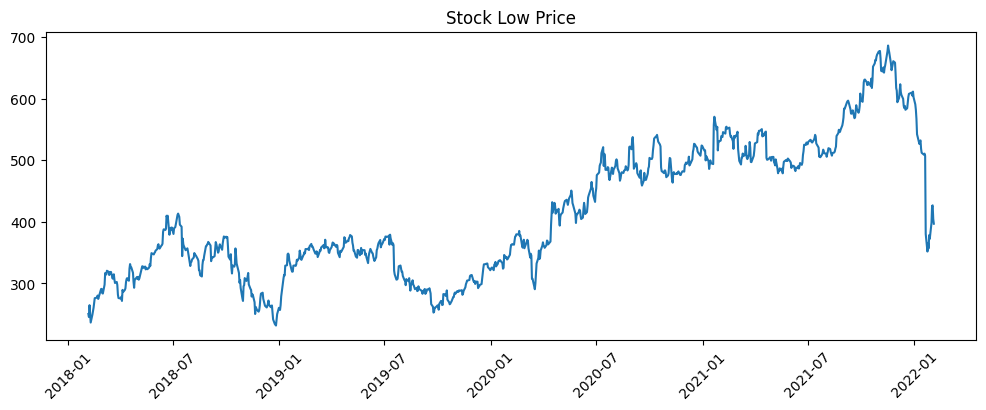

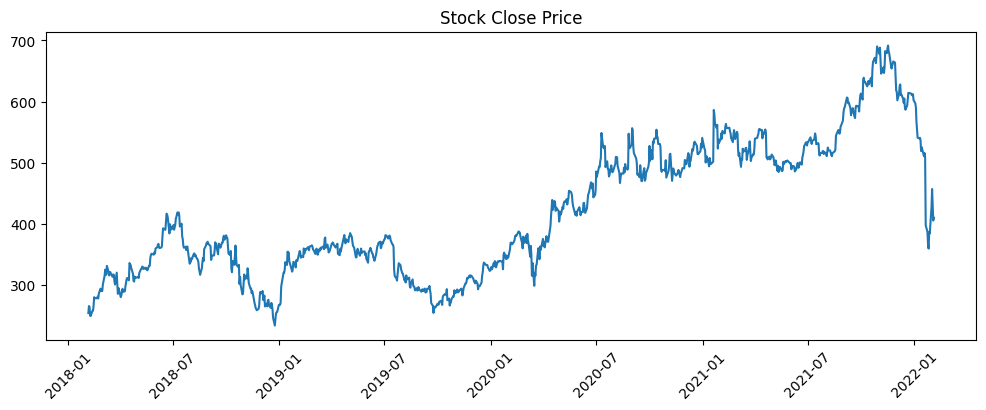

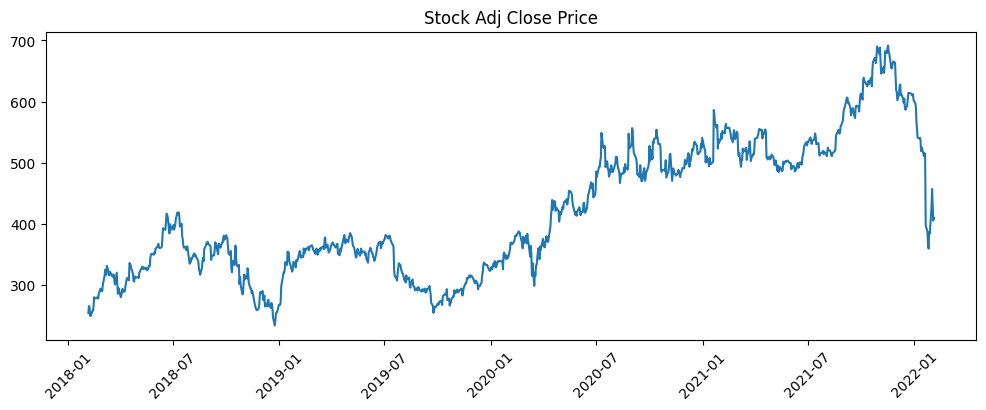

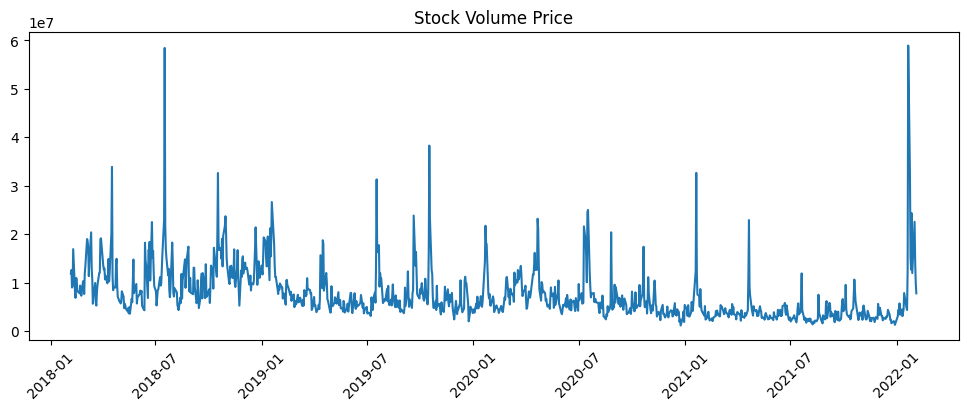

In [ ]:
for columns in data.columns:
    plt.figure(figsize=(12,4))
    plt.title(f"Stock {columns} Price")
    plt.plot(data.index,data[columns])
    plt.xticks(rotation=45)

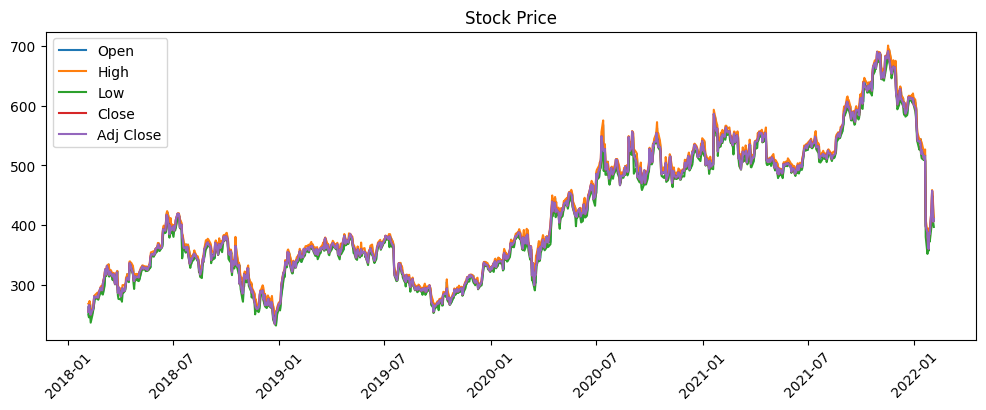

In [ ]:
plt.figure(figsize=(12,4))
plt.title("Stock Price")
for columns in data.columns:
    if(columns !='Volume'):
        plt.plot(data.index,data[columns],label=columns)
plt.xticks(rotation=45)
plt.legend()

- after ploting Data we decide to take High feature to predict when the stock will be high
- next step we Data normalization

# Data Normalization

In [ ]:
data=data['Close']
data.shape

(1009,)

In [ ]:
data

Date
2018-02-05    254.259995
2018-02-06    265.720001
2018-02-07    264.559998
2018-02-08    250.100006
2018-02-09    249.470001
                 ...    
2022-01-31    427.140015
2022-02-01    457.130005
2022-02-02    429.480011
2022-02-03    405.600006
2022-02-04    410.170013
Name: Close, Length: 1009, dtype: float64

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))

In [ ]:

np.array(data).reshape([data.shape[0],1])

array([[254.259995],
       [265.720001],
       [264.559998],
       ...,
       [429.480011],
       [405.600006],
       [410.170013]])

In [ ]:
# df=scaler.fit_transform(np.array(data['Close']).reshape(-1,1))
df=scaler.fit_transform(np.array(data).reshape([data.shape[0],1]))
df

array([[0.04451626],
       [0.06954849],
       [0.06701469],
       ...,
       [0.4272515 ],
       [0.37509011],
       [0.38507243]])

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train,X_test=train_test_split(df,test_size=0.2,random_state=0)

In [ ]:
# X_train.shape

In [ ]:
# X_test.shape

# Convert array Values into a dataset values

In [ ]:
def create_seq(data,time_step=100):
    X=[]
    y=[]
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step)])
        y.append(data[i+time_step])
    return X,y

In [ ]:
time_step=100
X,y=create_seq(df,time_step)

In [ ]:
X

[array([[0.04451626],
        [0.06954849],
        [0.06701469],
        [0.03542955],
        [0.03405342],
        [0.05257641],
        [0.05327534],
        [0.0701601 ],
        [0.10133021],
        [0.09750767],
        [0.09757319],
        [0.10301218],
        [0.09667768],
        [0.11369343],
        [0.13167034],
        [0.12391599],
        [0.12559796],
        [0.12343551],
        [0.14672022],
        [0.1771914 ],
        [0.19951508],
        [0.19064677],
        [0.18156003],
        [0.2131015 ],
        [0.19095254],
        [0.17911361],
        [0.19149862],
        [0.19049385],
        [0.18472731],
        [0.17387127],
        [0.18265218],
        [0.18042421],
        [0.15906164],
        [0.14647998],
        [0.18887749],
        [0.1459339 ],
        [0.11334393],
        [0.13426968],
        [0.10137394],
        [0.10875693],
        [0.12026823],
        [0.13125532],
        [0.12007165],
        [0.12243068],
        [0.14021101],
        [0

In [ ]:
len(X),len(y)

(908, 908)

In [ ]:
y

[array([0.35285382]),
 array([0.34413837]),
 array([0.35888248]),
 array([0.34215064]),
 array([0.35934124]),
 array([0.38087852]),
 array([0.40429435]),
 array([0.39699876]),
 array([0.40359536]),
 array([0.39234616]),
 array([0.35368381]),
 array([0.36390644]),
 array([0.31803588]),
 array([0.30853411]),
 array([0.28472512]),
 array([0.27777896]),
 array([0.28129573]),
 array([0.26963151]),
 array([0.28175442]),
 array([0.28223497]),
 array([0.26502258]),
 array([0.22079026]),
 array([0.22622924]),
 array([0.22826063]),
 array([0.24162861]),
 array([0.23854872]),
 array([0.25565193]),
 array([0.25763959]),
 array([0.24842179]),
 array([0.25224434]),
 array([0.24462111]),
 array([0.23466065]),
 array([0.22631656]),
 array([0.20209255]),
 array([0.19344269]),
 array([0.18107948]),
 array([0.20499772]),
 array([0.22747425]),
 array([0.24149756]),
 array([0.22998626]),
 array([0.27290798]),
 array([0.28548958]),
 array([0.29403024]),
 array([0.29304734]),
 array([0.29946923]),
 array([0.

## reshape input to be [samples, time-steps, features] which is required for LSTM

In [ ]:
np.array(X).shape

(908, 100, 1)

In [ ]:
np.array(y).shape

(908, 1)

In [ ]:
X=np.array(X)
X=X.reshape(X.shape[0],X.shape[1],1)
y=np.array(y)

In [ ]:
X.shape,y.shape

((908, 100, 1), (908, 1))

## Splitting the data

In [ ]:
X_train,X_test,y_train,y_test=X[:int(data.shape[0]*0.8)],X[int(data.shape[0]*0.8):],y[:int(data.shape[0]*0.8)],y[int(data.shape[0]*0.8):]

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((807, 100, 1), (101, 100, 1), (807, 1), (101, 1))

# Model

In [ ]:
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=X_train[0].shape))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(16,activation='relu'))
model.add(Dense(1))
model.compile(optimizer= keras.optimizers.Adam(learning_rate=0.001),loss="mean_squared_error",metrics=[keras.metrics.RootMeanSquaredError()])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 128)          66560     
                                                                 
 lstm_1 (LSTM)               (None, 100, 64)           49408     
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 128929 (503.63 KB)
Trainable params: 128929 (503.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Training the Model

In [ ]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
26/26 [==============================] - 13s 204ms/step - loss: 0.0296 - root_mean_squared_error: 0.1721
Epoch 2/100
26/26 [==============================] - 7s 268ms/step - loss: 0.0034 - root_mean_squared_error: 0.0581
Epoch 3/100
26/26 [==============================] - 5s 204ms/step - loss: 0.0030 - root_mean_squared_error: 0.0550
Epoch 4/100
26/26 [==============================] - 6s 228ms/step - loss: 0.0032 - root_mean_squared_error: 0.0565
Epoch 5/100
26/26 [==============================] - 7s 248ms/step - loss: 0.0035 - root_mean_squared_error: 0.0593
Epoch 6/100
26/26 [==============================] - 5s 209ms/step - loss: 0.0029 - root_mean_squared_error: 0.0541
Epoch 7/100
26/26 [==============================] - 7s 281ms/step - loss: 0.0026 - root_mean_squared_error: 0.0512
Epoch 8/100
26/26 [==============================] - 5s 207ms/step - loss: 0.0028 - root_mean_squared_error: 0.0530
Epoch 9/100
26/26 [==============================] - 8s 318ms/step - lo

## Test the Model

In [ ]:
trainPred=model.predict(X_train)
testPred=model.predict(X_test)
trainPred=scaler.inverse_transform(trainPred)
testPred=scaler.inverse_transform(testPred)

4/4 [==============================] - 0s 57ms/step


In [ ]:
trainPred

array([[395.75317],
       [399.4871 ],
       [398.72363],
       [403.50195],
       [399.51166],
       [403.23193],
       [412.72748],
       [424.24908],
       [423.79196],
       [423.9296 ],
       [419.00174],
       [402.7462 ],
       [401.32593],
       [387.08975],
       [379.34705],
       [370.8749 ],
       [366.7148 ],
       [367.6787 ],
       [365.52167],
       [368.0341 ],
       [369.59375],
       [364.23737],
       [347.80936],
       [341.04016],
       [340.68005],
       [345.56406],
       [347.65695],
       [352.5913 ],
       [355.45862],
       [353.161  ],
       [352.17575],
       [349.85263],
       [345.9682 ],
       [342.06552],
       [334.28513],
       [328.4377 ],
       [323.67783],
       [328.38644],
       [339.09836],
       [348.94427],
       [349.09592],
       [358.98605],
       [368.4227 ],
       [373.77783],
       [373.97003],
       [374.7329 ],
       [372.66736],
       [368.75867],
       [352.48526],
       [348.46307],


In [ ]:
testPred

array([[598.5445 ],
       [588.8038 ],
       [578.46045],
       [584.17377],
       [586.8361 ],
       [589.4708 ],
       [574.9935 ],
       [573.67505],
       [590.10065],
       [591.013  ],
       [590.42285],
       [590.32733],
       [581.425  ],
       [597.57916],
       [606.49286],
       [609.1324 ],
       [600.1074 ],
       [631.0917 ],
       [630.76855],
       [626.3739 ],
       [628.4885 ],
       [623.26697],
       [622.89496],
       [627.6574 ],
       [630.7679 ],
       [625.3123 ],
       [635.3625 ],
       [633.92053],
       [620.7783 ],
       [649.6854 ],
       [654.2121 ],
       [660.53864],
       [656.85645],
       [653.2023 ],
       [664.2684 ],
       [675.78033],
       [666.07916],
       [666.9865 ],
       [675.6593 ],
       [655.1422 ],
       [637.9372 ],
       [646.70026],
       [648.24005],
       [638.533  ],
       [651.34125],
       [671.2696 ],
       [663.71826],
       [674.75024],
       [675.8461 ],
       [667.5384 ],


## Model performance

In [ ]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 2s 57ms/step - loss: 0.0018 - root_mean_squared_error: 0.0421


[0.0017698218580335379, 0.04206925258040428]

## Ploting Performance

In [ ]:
look_back=time_step
# shift train predictions for plotting (time step)

trainPredPlot=np.empty_like(scaler.inverse_transform(df))
trainPredPlot[:]=np.nan
trainPredPlot[look_back:len(trainPred)+look_back]=trainPred

#shift test predictions for plotting(time_step)
testPredPlot=np.empty_like(scaler.inverse_transform(df))
testPredPlot[:]=np.nan
testPredPlot[len(trainPred)+look_back:len(trainPred)+look_back+len(testPred)]=testPred


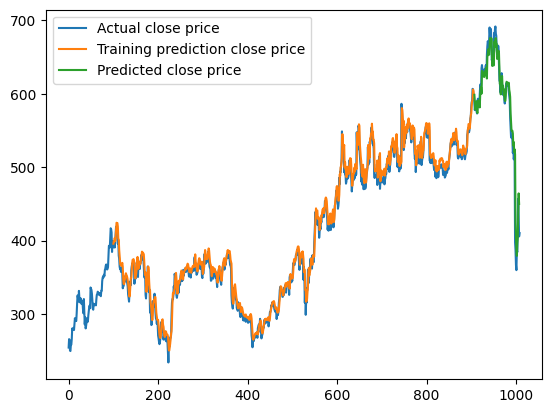

In [ ]:
plt.plot(scaler.inverse_transform(df),label="Actual close price")
plt.plot(trainPredPlot,label="Training prediction close price")
plt.plot(testPredPlot,label="Predicted close price")
plt.legend()
plt.show()

# Next 30 days prediction

In [ ]:
predection_data=np.array(data[-time_step:])
predection_data=predection_data.reshape([predection_data.shape[0],1])

In [ ]:
def predication(data,days=30):
    data=scaler.transform(data)
    pred=[]
    for i in range(1,days+1):
        nxt_day=model.predict([data],verbose=0)
        pred.append(scaler.inverse_transform(nxt_day)[0])
        data[:-1]=data[1:]
        data[-1]=nxt_day[0]
    return np.array(pred).squeeze()

In [ ]:
days=30
res=predication(predection_data,days)

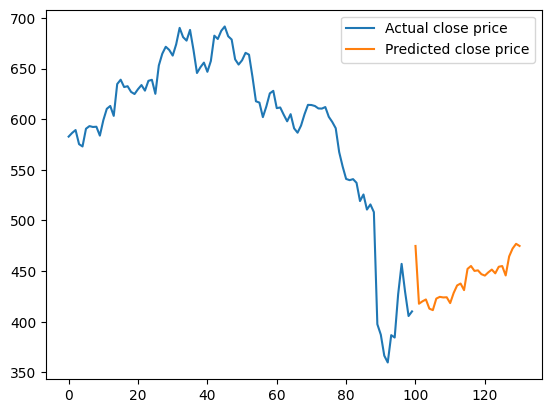

In [ ]:
trainPredPlot=np.zeros(shape=[len(predection_data)+1+days])
trainPredPlot[:]=np.nan
trainPredPlot[len(predection_data)]=res[-1]
trainPredPlot[len(predection_data)+1:]=res
df_=predection_data
plt.plot(df_,label="Actual close price")
plt.plot(trainPredPlot,label="Predicted close price")
plt.legend()
plt.show()